Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from google.colab import drive
import os
from google.colab import files
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
import os
from google.colab import files

os.chdir('/content/gdrive/MyDrive')



In [4]:
!mkdir kaggle

os.chdir('/content/gdrive/MyDrive/kaggle')

In [5]:
!mkdir cancer

In [6]:
os.chdir('/content/gdrive/MyDrive/kaggle/cancer')

In [7]:
!mkdir train
!mkdir test

In [8]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/kaggle/cancer/train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/kaggle/cancer/test')

In [12]:
os.chdir('/content/gdrive/MyDrive/25_CNN_Assignment')

In [13]:
!dir

In [14]:
os.chdir('/content/gdrive/MyDrive/kaggle/cancer')

In [15]:
!unzip   '/content/gdrive/MyDrive/CNN_assignment.zip' 

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating

In [16]:
!dir

Skin\ cancer\ ISIC\ The\ International\ Skin\ Imaging\ Collaboration  train
test


In [17]:
!mv '/content/gdrive/MyDrive/kaggle/cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train' '/content/gdrive/MyDrive/kaggle/cancer/train'

In [18]:
!mv '/content/gdrive/MyDrive/kaggle/cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test' '/content/gdrive/MyDrive/kaggle/cancer/test'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [19]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/kaggle/cancer/train/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/kaggle/cancer/test/Test')

In [20]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [21]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [22]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,

    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset="training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [23]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,

    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [24]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [25]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [26]:
print(val_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [27]:
dir(val_ds)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_get_legacy_saved_model_children',
 '_graph',
 '_graph

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

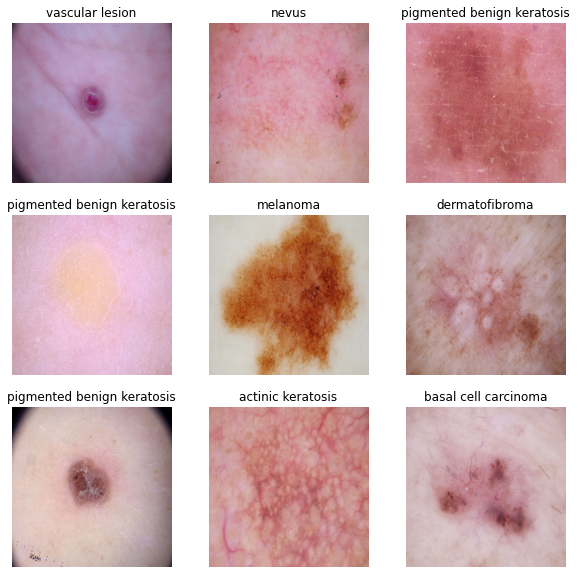

In [28]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [29]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [30]:
### Your code goes here
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

In [31]:
## First Model without BatchNormalisation and no dropouts 

In [32]:
input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

## Number of classes is 9
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                    

In [33]:
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
loss='binary_crossentropy'

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [34]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [35]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                    

### Train the model

In [36]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 31s 121ms/step - loss: nan - accuracy: 0.1708 - val_loss: nan - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 4s 63ms/step - loss: nan - accuracy: 0.1641 - val_loss: nan - val_accuracy: 0.0492
Epoch 3/20
56/56 [==============================] - 3s 61ms/step - loss: nan - accuracy: 0.0513 - val_loss: nan - val_accuracy: 0.0492
Epoch 4/20
56/56 [==============================] - 3s 62ms/step - loss: nan - accuracy: 0.0513 - val_loss: nan - val_accuracy: 0.0492
Epoch 5/20
56/56 [==============================] - 4s 63ms/step - loss: nan - accuracy: 0.0513 - val_loss: nan - val_accuracy: 0.0492
Epoch 6/20
56/56 [==============================] - 4s 63ms/step - loss: nan - accuracy: 0.0513 - val_loss: nan - val_accuracy: 0.0492
Epoch 7/20
56/56 [==============================] - 4s 65ms/step - loss: nan - accuracy: 0.0513 - val_loss: nan - val_accuracy: 0.0492
Epoch 8/20
56/56 [==============================] - 3

### Visualizing training results

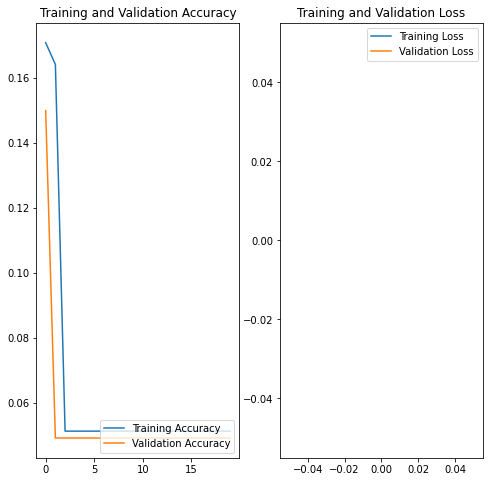

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
## 2nd model with batch normalisation and dropouts

In [39]:
input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D  (pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D  (pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D  (pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Number of classes is 9
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 86, 86, 64)       256       
 ormalization)                                        

In [40]:

optimizer = 'adam'
loss_fn = "binary_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 86, 86, 64)       256       
 ormalization)                                        

In [42]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 90ms/step - loss: -78505.8047 - accuracy: 0.1708 - val_loss: -71270.1016 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 4s 68ms/step - loss: -829618.4375 - accuracy: 0.1724 - val_loss: -839609.7500 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 4s 68ms/step - loss: -3022524.2500 - accuracy: 0.1724 - val_loss: -3471378.5000 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 4s 68ms/step - loss: -7526091.5000 - accuracy: 0.1724 - val_loss: -7647134.0000 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 4s 68ms/step - loss: -15011606.0000 - accuracy: 0.1724 - val_loss: -17092680.0000 - val_accuracy: 0.1499
Epoch 6/20
56/56 [==============================] - 4s 68ms/step - loss: -26323164.0000 - accuracy: 0.1724 - val_loss: -27784350.0000 - val_accuracy: 0.1499
Epoch 7/20
56/56 [==============================] - 4s 68ms/step - loss:

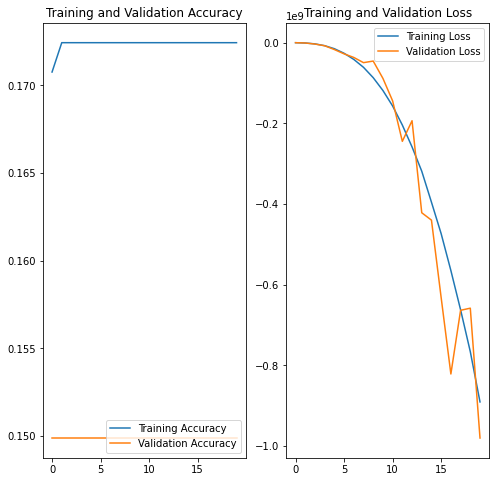

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [44]:
## This is definately overfitting the data hence large difference in accuracy for validation set and training set

In [45]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

In [46]:
## Last year should be softmax as we have multiple categories 
num_classes = 9

In [47]:
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180, 180, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [48]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_4 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 batch_normalization_2 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_5 (Activation)   (None, 178, 178, 32)      0         
                                                      

In [49]:
# compile
model.compile(loss=tf.keras.metrics.sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])



In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_4 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 batch_normalization_2 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_5 (Activation)   (None, 178, 178, 32)      0         
                                                      

In [51]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 9s 122ms/step - loss: 5.4281 - accuracy: 0.3092 - val_loss: 3.7429 - val_accuracy: 0.1074
Epoch 2/20
56/56 [==============================] - 5s 97ms/step - loss: 1.8170 - accuracy: 0.4241 - val_loss: 6.7787 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 6s 98ms/step - loss: 1.4571 - accuracy: 0.5195 - val_loss: 6.1716 - val_accuracy: 0.1633
Epoch 4/20
56/56 [==============================] - 6s 98ms/step - loss: 1.1844 - accuracy: 0.5815 - val_loss: 5.0864 - val_accuracy: 0.1857
Epoch 5/20
56/56 [==============================] - 6s 98ms/step - loss: 1.0053 - accuracy: 0.6462 - val_loss: 4.9715 - val_accuracy: 0.2192
Epoch 6/20
56/56 [==============================] - 6s 99ms/step - loss: 0.8501 - accuracy: 0.7026 - val_loss: 3.9878 - val_accuracy: 0.2774
Epoch 7/20
56/56 [==============================] - 6s 99ms/step - loss: 0.7449 - accuracy: 0.7405 - val_loss: 2.1750 - val_accuracy: 0.4027
Epoch 8/20
5

In [52]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [53]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here



### Compiling the model

In [54]:
## Your code goes here

### Training the model

In [56]:
## Your code goes here, note: train your model for 20 epochs


### Visualizing the results

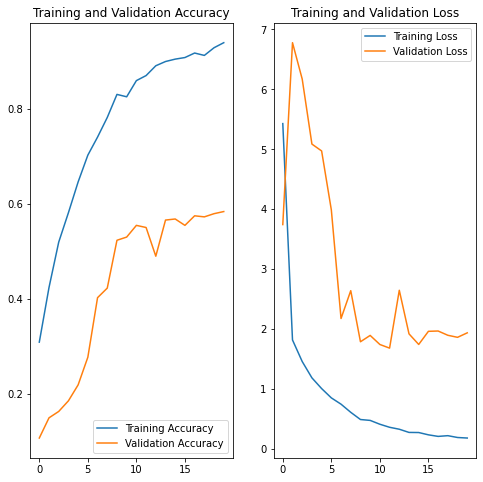

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 0s 24ms/step - loss: 1.9357 - accuracy: 0.5839
Accuracy:  0.9386160969734192
Validation Accuracy:  0.5838926434516907
Loss:  0.15201112627983093
Validation Loss 1.9357353448867798


In [59]:
## Highly overfit ,lets do augmentation now

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 720x720 with 0 Axes>

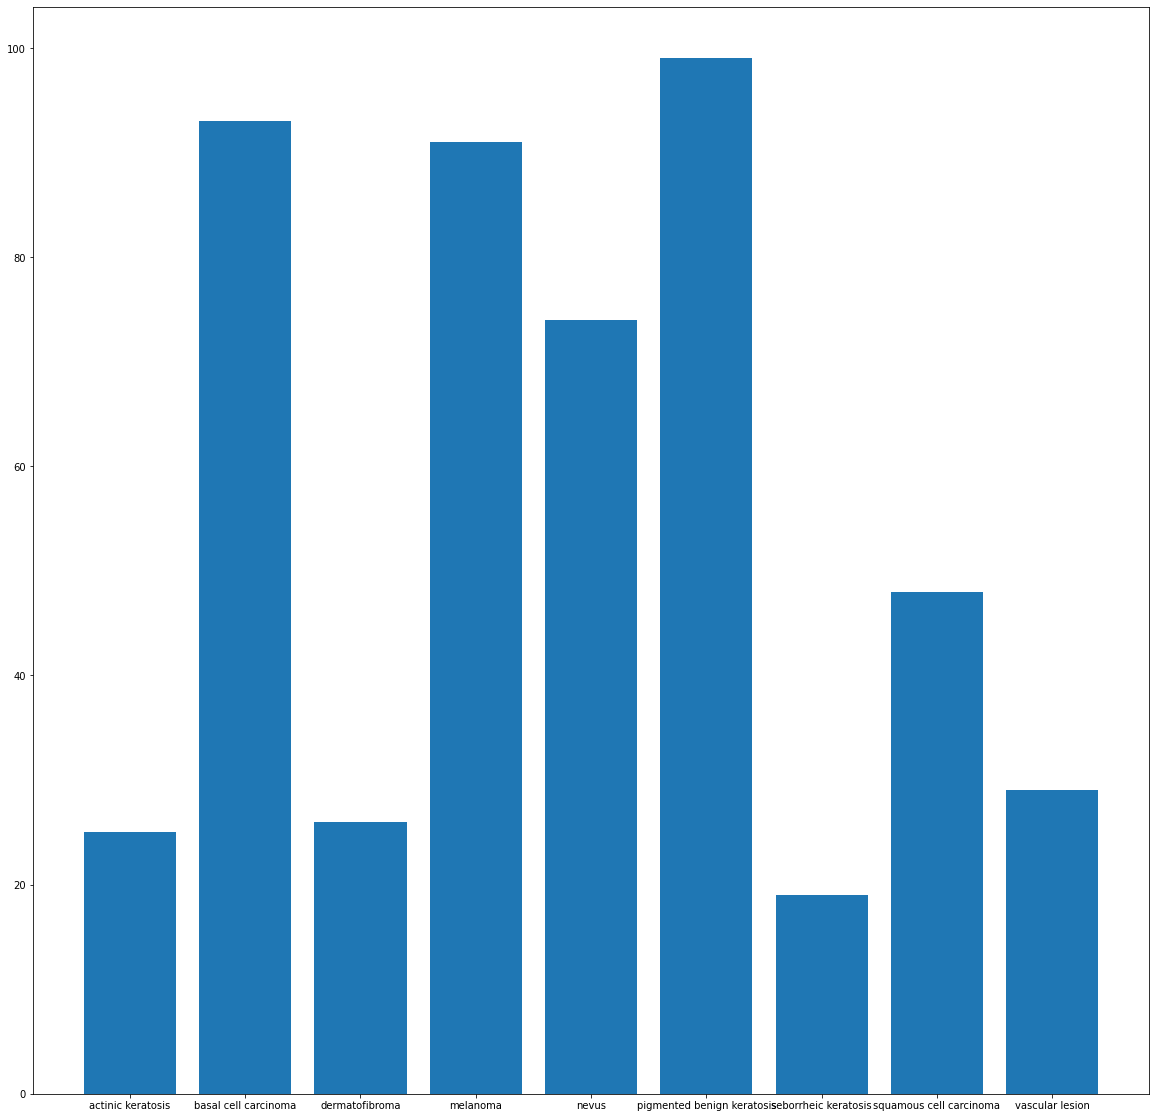

In [60]:
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


### Seborrheic keratosis class has least number of samples
### Pigmented benign keratosis has maximum number of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [61]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [62]:
path_to_training_dataset="/content/gdrive/MyDrive/kaggle/cancer/train/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/kaggle/cancer/train/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CDE16A4D0>: 100%|██████████| 500/500 [00:21<00:00, 23.78 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/kaggle/cancer/train/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CE0C5DDD0>: 100%|██████████| 500/500 [00:21<00:00, 23.37 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/kaggle/cancer/train/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CE0E48910>: 100%|██████████| 500/500 [00:22<00:00, 22.58 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/kaggle/cancer/train/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F6CDE16B690>: 100%|██████████| 500/500 [01:30<00:00,  5.54 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/kaggle/cancer/train/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=962x641 at 0x7F6CDE19A710>: 100%|██████████| 500/500 [01:26<00:00,  5.80 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/kaggle/cancer/train/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CDE109050>: 100%|██████████| 500/500 [00:17<00:00, 28.43 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/kaggle/cancer/train/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6CE0C5E890>: 100%|██████████| 500/500 [00:40<00:00, 12.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/kaggle/cancer/train/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CE0E68A50>: 100%|██████████| 500/500 [00:19<00:00, 25.87 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/kaggle/cancer/train/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6CE0BEE550>: 100%|██████████| 500/500 [00:18<00:00, 27.63 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [63]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [64]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/kaggle/cancer/train/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031430.jpg_11e0c0ac-a24e-4084-aee4-45e258fe723a.jpg',
 '/content/gdrive/MyDrive/kaggle/cancer/train/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027172.jpg_391ff9a8-4efc-4077-9cea-06c7bd11f65b.jpg',
 '/content/gdrive/MyDrive/kaggle/cancer/train/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029827.jpg_52f08525-4b6d-4235-8e10-4e9baccdc4a9.jpg',
 '/content/gdrive/MyDrive/kaggle/cancer/train/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028990.jpg_b426e9bd-a660-474c-a7ed-b13d972ba483.jpg',
 '/content/gdrive/MyDrive/kaggle/cancer/train/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028190.jpg_58cbb34c-8874-4355-a610-3ea421926794.jpg',
 '/content/gdrive/MyDrive/kaggle/cancer/train/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027884.jpg_4a0c7165-defd-4514-aba3-e584f380ff01.jpg',
 '/content/gdriv

In [65]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [66]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [67]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [68]:
df2.shape

(4500, 2)

In [69]:
df2.head(4)

,Path,Label
0,/content/gdrive/MyDrive/kaggle/cancer/train/Tr...,actinic keratosis
1,/content/gdrive/MyDrive/kaggle/cancer/train/Tr...,actinic keratosis
2,/content/gdrive/MyDrive/kaggle/cancer/train/Tr...,actinic keratosis
3,/content/gdrive/MyDrive/kaggle/cancer/train/Tr...,actinic keratosis


In [70]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [71]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [72]:
data_dir_train="/content/gdrive/MyDrive/kaggle/cancer/train/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [73]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [74]:
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180, 180, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [75]:
# compile
model.compile(loss=tf.keras.metrics.sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])



In [76]:

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      9248      
                                                                 
 activation_11 (Activation)  (None, 178, 178, 32)      0         
                                                      

#### **Todo:**  Train your model

In [77]:
epochs = 30

batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/30
169/169 [==============================] - 35s 200ms/step - loss: 2.8914 - accuracy: 0.3807 - val_loss: 6.8272 - val_accuracy: 0.1321
Epoch 2/30
169/169 [==============================] - 35s 200ms/step - loss: 1.2316 - accuracy: 0.5668 - val_loss: 2.3019 - val_accuracy: 0.4180
Epoch 3/30
169/169 [==============================] - 33s 191ms/step - loss: 0.9160 - accuracy: 0.6691 - val_loss: 1.1803 - val_accuracy: 0.6162
Epoch 4/30
169/169 [==============================] - 33s 191ms/step - loss: 0.7383 - accuracy: 0.7411 - val_loss: 0.8660 - val_accuracy: 0.7008
Epoch 5/30
169/169 [==============================] - 33s 191ms/step - loss: 0.5737 - accuracy: 0.7884 - val_loss: 0.7947 - val_accuracy: 0.7342
Epoch 6/30
169/169 [==============================] - 34s 197ms/step - loss: 0.4799 - accuracy: 0.8270 - val_loss: 0.6480 - val_accuracy: 0.7580
Epoch 7/30
169/169 [==============================] - 33s 191ms/step - loss: 0.4080 - accuracy: 0.8561 - val_loss: 0.6764 - val_ac

#### **Todo:**  Visualize the model results

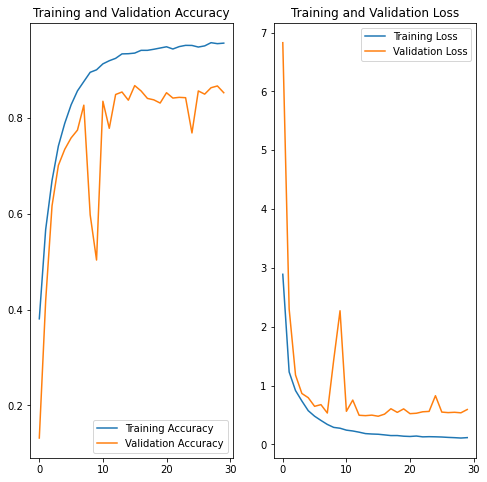

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Although there is a lottle overfitting but we achive high accuracy in both    training and validation set  Yes rebalancing the data has helped a lot

#### Now lets try dropouts and simpler model to reduce the overfitting 

In [107]:
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180, 180, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())



model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [108]:
# compile
model.compile(loss=tf.keras.metrics.sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [109]:


model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 activation_44 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 batch_normalization_28 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 178, 178, 32)      9248      
                                                                 
 activation_45 (Activation)  (None, 178, 178, 32)      0         
                                                      

In [110]:

epochs = 30
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [111]:
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs 
)



Epoch 1/30
169/169 [==============================] - 34s 192ms/step - loss: 2.2523 - accuracy: 0.3752 - val_loss: 7.3798 - val_accuracy: 0.1366
Epoch 2/30
169/169 [==============================] - 34s 193ms/step - loss: 1.2542 - accuracy: 0.5512 - val_loss: 2.0666 - val_accuracy: 0.3556
Epoch 3/30
169/169 [==============================] - 33s 188ms/step - loss: 1.0070 - accuracy: 0.6359 - val_loss: 1.0064 - val_accuracy: 0.6288
Epoch 4/30
169/169 [==============================] - 35s 204ms/step - loss: 0.8360 - accuracy: 0.6934 - val_loss: 1.5000 - val_accuracy: 0.5145
Epoch 5/30
169/169 [==============================] - 34s 193ms/step - loss: 0.7046 - accuracy: 0.7467 - val_loss: 0.9393 - val_accuracy: 0.6733
Epoch 6/30
169/169 [==============================] - 33s 191ms/step - loss: 0.5980 - accuracy: 0.7795 - val_loss: 0.8863 - val_accuracy: 0.6689
Epoch 7/30
169/169 [==============================] - 33s 189ms/step - loss: 0.5098 - accuracy: 0.8131 - val_loss: 0.8061 - val_ac

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

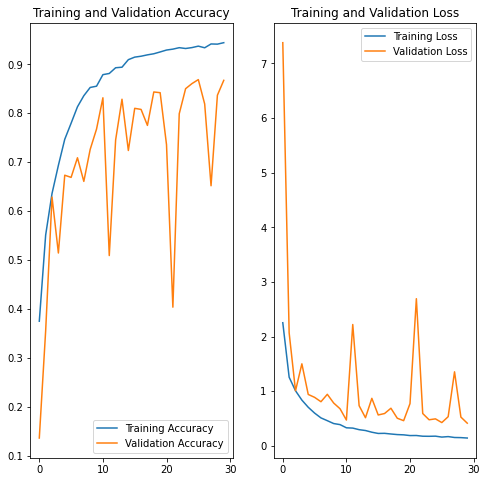

In [113]:

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [114]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


43/43 [==============================] - 6s 115ms/step - loss: 0.4133 - accuracy: 0.8671
Accuracy:  0.966431736946106
Validation Accuracy:  0.8671121001243591
Loss:  0.07613089680671692
Validation Loss 0.41331109404563904


This model is better than earlier model as it is not overfitting now
